In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

In [4]:
import random
# n: numeber of nodes
# q: number of long-range contacts
# r: clustering exponent

def calT(G):
    total_length = 0
    for node_1 in G.nodes():
        for node_2 in G.nodes():
            if node_1 >= node_2:
                continue
            total_length += nx.shortest_path_length(G, node_1, node_2)
    return total_length / (len(G.nodes()) * (len(G.nodes()) - 1) / 2)
            
def watts_strogatz_kleinberg_graph_1D(n, q, r):
    G = nx.path_graph(n)
    long_contact_prob = float(q/n)
    in_list = []
    
    for node_1 in G.nodes():
        if node_1 in in_list:
            continue
        total_prob = 0
        prob_list = []

        for node_2 in G.nodes():
            distance = abs(node_2 - node_1)
            if distance == 0:
                prob_list.append(0)
                continue
            prob = (1 / distance**r)
            prob_list.append(prob)
            total_prob += prob
        prob_list = [x / total_prob for x in prob_list]
        for i in range(1, len(prob_list)):
            prob_list[i] = prob_list[i] + prob_list[i-1]
        # q=1
        random_number = random.random()
        for i in range(len(prob_list)):
            if random_number <= prob_list[i]:
                G.add_edge(i, node_1)
                in_list.append(i)
                break
    # print(G.edges(1))
    return G, nx.average_shortest_path_length(G)

# graph, length = watts_strogatz_kleinberg_graph_1D(10000, 1, 2)
# print(f"Length: {length}")
# graph.edges(1)

Text(0, 0.5, 'lnT for greedy algorithm')

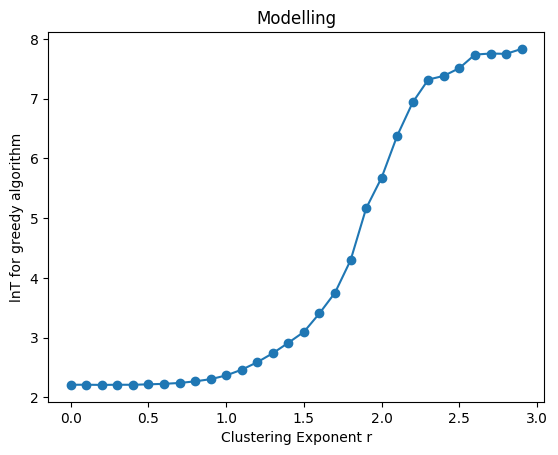

In [5]:
T = []
x = []
for r in np.arange(0, 3, 0.1):
    graph, length = watts_strogatz_kleinberg_graph_1D(10000, 1, r)
    x.append(r)
    T.append(np.log(length))

plt.plot(x, T, marker='o', linestyle='-')
plt.title('Modelling')
plt.xlabel('Clustering Exponent r')
plt.ylabel('lnT for greedy algorithm')